In [5]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt
grocery_df= pd.read_csv("/content/Groceries data.csv")
grocery_df.head()
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
len(grocery_df)


38765

In [7]:
grocery_df.isna().sum()

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

In [8]:
len(grocery_df[grocery_df.duplicated(keep='first')==True])


759

In [9]:
grocery_df.drop_duplicates(inplace=True)# Dropping the duplicates
grocery_df.dtypes

Member_number       int64
Date               object
itemDescription    object
year                int64
month               int64
day                 int64
day_of_week         int64
dtype: object

In [10]:
grocery_df['itemDescription'].value_counts(ascending=False).reset_index()


,index,itemDescription
0,whole milk,2363
1,other vegetables,1827
2,rolls/buns,1646
3,soda,1453
4,yogurt,1285
...,...,...
162,rubbing alcohol,5
163,bags,4
164,baby cosmetics,3
165,kitchen utensil,1


Text(0, 0.5, 'Number of Items Sold')

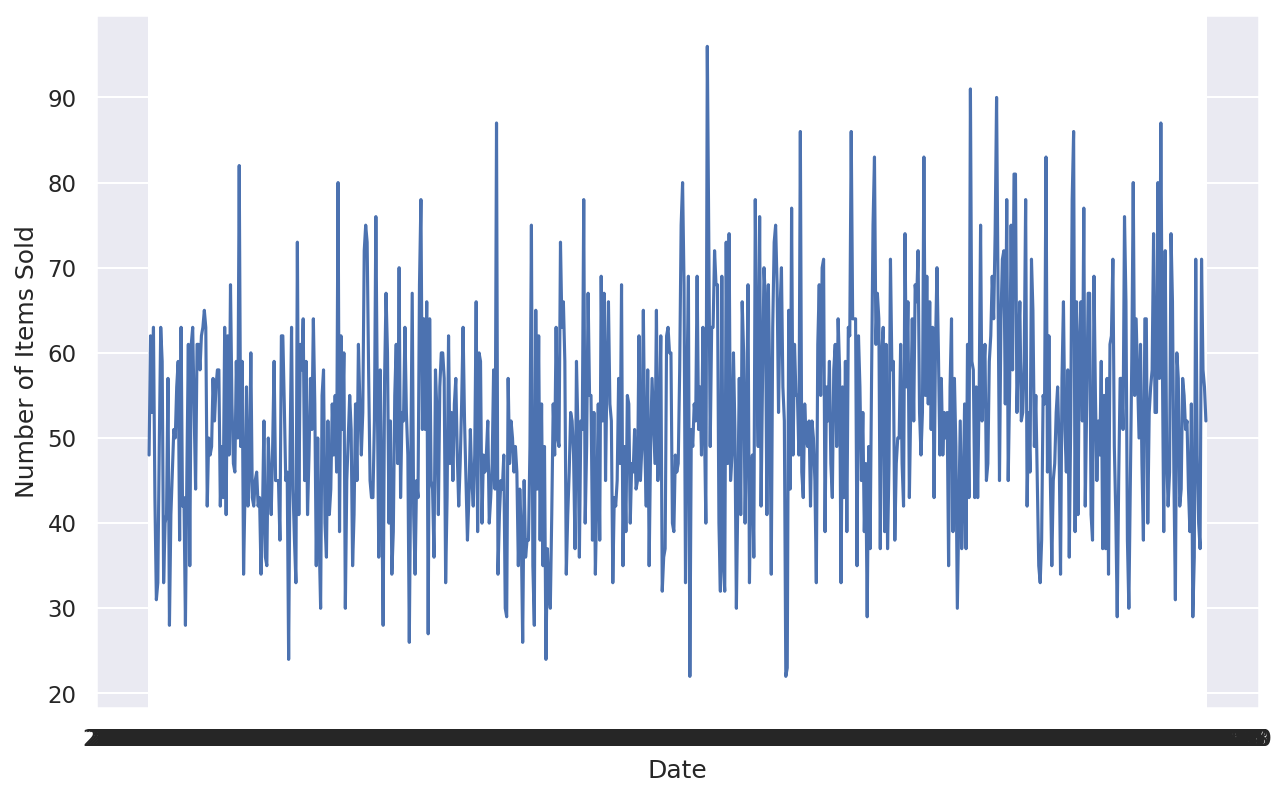

In [11]:
date_df= grocery_df.groupby('Date')['itemDescription'].count().reset_index()
plt.figure(figsize=(10,6), dpi=150)
sns.lineplot(data= date_df, x='Date', y='itemDescription')
plt.xlabel('Date')
plt.ylabel('Number of Items Sold')


<Figure size 750x450 with 0 Axes>

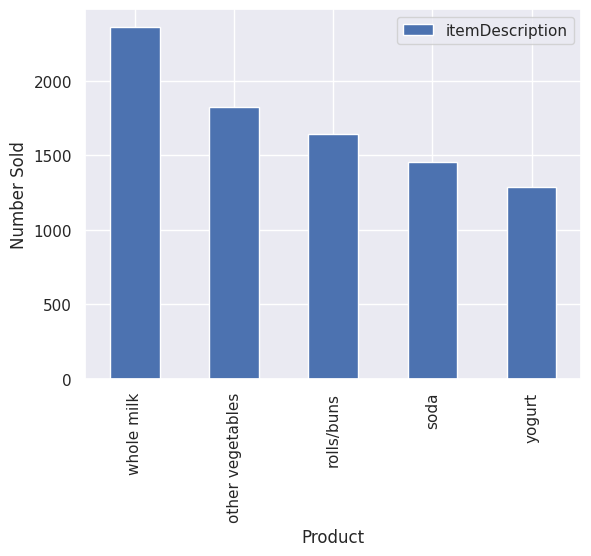

In [12]:
grocery_df.groupby('Date')['itemDescription'].count().idxmax()

grocery_df.groupby('Date')['itemDescription'].count().idxmin()

plt.figure(figsize=(5,3), dpi=150)
grocery_df.itemDescription.value_counts(ascending=False).reset_index().head(5).plot(kind='bar', x='index')
plt.xlabel('Product', size= 12)
plt.ylabel('Number Sold', size= 12)
plt.show()


In [13]:
grocery_df[(grocery_df.Member_number==1808) & (grocery_df.Date== '2015-07-21')]


,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
16149,1808,2015-07-21,rolls/buns,2015,7,21,1
36088,1808,2015-07-21,candy,2015,7,21,1


In [14]:
member = grocery_df.Member_number.values # extracting unique members
dates = grocery_df.Date.values # extracting Dates
transactions = [list(grocery_df[(grocery_df['Member_number'] == i[0]) & (grocery_df['Date'] == i[1])].itemDescription) for i in zip(member,dates)]
transactions[0]


['tropical fruit', 'rolls/buns', 'candy']

In [16]:
from itertools import permutations
flattenlist= [i for row in transactions for  i in row  ]
flattenlist= list(set(flattenlist))
rules = list(permutations(flattenlist,2))
rules[0], len(rules)


(('liver loaf', 'decalcifier'), 27722)

In [17]:
from collections import Counter
newlist= []
for i in transactions:
    newlist.append(tuple(i))
c= Counter(newlist)
c.most_common(1)


[(('other vegetables', 'whole milk'), 98)]

In [18]:
from mlxtend.preprocessing import TransactionEncoder
encoder = TransactionEncoder().fit(transactions)
onehot = encoder.transform(transactions)
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot.head()


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,...,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False


In [19]:
print(onehot.mean())


Instant food products    0.004499
UHT-milk                 0.024575
abrasive cleaner         0.001921
artif. sweetener         0.002947
baby cosmetics           0.000316
                           ...   
white bread              0.029022
white wine               0.013840
whole milk               0.181445
yogurt                   0.100931
zwieback                 0.004868
Length: 167, dtype: float64


In [20]:
onehot['other vegetables & whole milk'] = np.logical_and(onehot['other vegetables'],onehot['whole milk'])
support_milk= onehot['whole milk'].mean()
support_vegetable= onehot['other vegetables & whole milk'].mean()
support_vegandmilk= np.logical_and(onehot['other vegetables'],onehot['whole milk']).mean()
confidence= support_vegandmilk/support_vegetable
print("Confidence: ", confidence)


Confidence:  1.0


In [21]:
lift = support_vegandmilk/(support_vegetable* support_milk)
print("Lift: ", lift)


Lift:  5.511310904872389


In [22]:
Leverage= support_vegandmilk - (support_vegetable* support_milk)
print("Leverage: ", Leverage)


Leverage:  0.01796229123860991


In [23]:
support_milk= onehot['whole milk'].mean()
support_vegetable= onehot['other vegetables & whole milk'].mean()
support_vegandmilk= np.logical_and(onehot['other vegetables'],onehot['whole milk']).mean()
num = support_vegandmilk - support_milk*support_vegetable
denom = max(support_vegandmilk*(1-support_vegetable), support_vegetable*(support_milk-support_vegandmilk))
zhang = num / denom
print("Zhang Metric" ,zhang) # Value is positive, so positive association


Zhang Metric 0.8369202625632196


In [24]:
frequent_itemsets = apriori(onehot, min_support = 0.01, max_len = 3, use_colnames = True)
print(len(frequent_itemsets))


92


In [25]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(onehot, use_colnames=True, min_support=0.01, max_len = 2)


In [27]:
rules = association_rules(frequent_itemsets,metric = "support",min_threshold = 0.0)
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(whole milk),0.054860,0.181445,0.010472,0.190887,1.052039,0.000518,1.011670,0.052336
1,(whole milk),(bottled beer),0.181445,0.054860,0.010472,0.057715,1.052039,0.000518,1.003030,0.060430
2,(bottled water),(whole milk),0.069226,0.181445,0.010209,0.147472,0.812766,-0.002352,0.960151,-0.198396
3,(whole milk),(bottled water),0.181445,0.069226,0.010209,0.056265,0.812766,-0.002352,0.986266,-0.219622
4,(citrus fruit),(whole milk),0.060911,0.181445,0.011261,0.184881,1.018938,0.000209,1.004216,0.019791


In [28]:
rules.consequents.unique()


array([frozenset({'whole milk'}), frozenset({'bottled beer'}),
       frozenset({'bottled water'}), frozenset({'citrus fruit'}),
       frozenset({'other vegetables'}), frozenset({'rolls/buns'}),
       frozenset({'sausage'}), frozenset({'soda'}), frozenset({'yogurt'}),
       frozenset({'other vegetables & whole milk'}),
       frozenset({'pastry'}), frozenset({'root vegetables'}),
       frozenset({'tropical fruit'})], dtype=object)

In [31]:
def zhangs_rule(rules):
    rule_support = rules['support'].copy()
    rule_ante = rules['antecedent support'].copy()
    rule_conseq = rules['consequent support'].copy()
    num = rule_support - (rule_ante * rule_conseq)
    denom = np.max((rule_support * (1 - rule_ante).values,
                          rule_ante * (rule_conseq - rule_support).values), axis = 0)
    return num / denom

rules_zhangs_list = zhangs_rule(rules)
rules = rules.assign(zhang = rules_zhangs_list)
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,zhang
0,(bottled beer),(whole milk),0.054860,0.181445,0.010472,0.190887,1.052039,0.000518,1.011670,0.052336,0.052336
1,(whole milk),(bottled beer),0.181445,0.054860,0.010472,0.057715,1.052039,0.000518,1.003030,0.060430,0.060430
2,(bottled water),(whole milk),0.069226,0.181445,0.010209,0.147472,0.812766,-0.002352,0.960151,-0.198396,-0.198396
3,(whole milk),(bottled water),0.181445,0.069226,0.010209,0.056265,0.812766,-0.002352,0.986266,-0.219622,-0.219622
4,(citrus fruit),(whole milk),0.060911,0.181445,0.011261,0.184881,1.018938,0.000209,1.004216,0.019791,0.019791


In [32]:
rules[rules.zhang<=0]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,zhang
2,(bottled water),(whole milk),0.069226,0.181445,0.010209,0.147472,0.812766,-0.002352,0.960151,-0.198396,-0.198396
3,(whole milk),(bottled water),0.181445,0.069226,0.010209,0.056265,0.812766,-0.002352,0.986266,-0.219622,-0.219622
6,(rolls/buns),(other vegetables),0.126822,0.136531,0.015576,0.122822,0.899587,-0.001739,0.984371,-0.113344,-0.113344
7,(other vegetables),(rolls/buns),0.136531,0.126822,0.015576,0.114087,0.899587,-0.001739,0.985625,-0.114473,-0.114473
10,(other vegetables),(soda),0.136531,0.111482,0.013945,0.102139,0.916191,-0.001276,0.989594,-0.095792,-0.095792
11,(soda),(other vegetables),0.111482,0.136531,0.013945,0.125089,0.916191,-0.001276,0.986921,-0.093343,-0.093343
12,(other vegetables),(whole milk),0.136531,0.181445,0.021944,0.160725,0.885803,-0.002829,0.975312,-0.129908,-0.129908
13,(whole milk),(other vegetables),0.181445,0.136531,0.021944,0.120940,0.885803,-0.002829,0.982264,-0.136066,-0.136066
14,(other vegetables),(yogurt),0.136531,0.100931,0.012288,0.089998,0.891675,-0.001493,0.987985,-0.123340,-0.123340
15,(yogurt),(other vegetables),0.100931,0.136531,0.012288,0.121741,0.891675,-0.001493,0.983160,-0.119038,-0.119038


In [33]:
rules[rules.zhang>0].sort_values('zhang', ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,zhang
16,(other vegetables),(other vegetables & whole milk),0.136531,0.021944,0.021944,0.160725,7.324340,0.018948,1.165358,1.000000,1.000000
40,(whole milk),(other vegetables & whole milk),0.181445,0.021944,0.021944,0.120940,5.511311,0.017962,1.112615,1.000000,1.000000
17,(other vegetables & whole milk),(other vegetables),0.021944,0.136531,0.021944,1.000000,7.324340,0.018948,inf,0.882842,0.882842
41,(other vegetables & whole milk),(whole milk),0.021944,0.181445,0.021944,1.000000,5.511311,0.017962,inf,0.836920,0.836920
33,(yogurt),(sausage),0.100931,0.074225,0.010051,0.099583,1.341633,0.002559,1.028162,0.283226,0.283226
32,(sausage),(yogurt),0.074225,0.100931,0.010051,0.135413,1.341633,0.002559,1.039882,0.275056,0.275056
29,(soda),(sausage),0.111482,0.074225,0.010051,0.090158,1.214658,0.001776,1.017512,0.198896,0.198896
28,(sausage),(soda),0.074225,0.111482,0.010051,0.135413,1.214658,0.001776,1.027679,0.190892,0.190892
31,(whole milk),(sausage),0.181445,0.074225,0.014998,0.082657,1.113593,0.001530,1.009191,0.124617,0.124617
30,(sausage),(whole milk),0.074225,0.181445,0.014998,0.202056,1.113593,0.001530,1.025830,0.110185,0.110185


In [34]:
rules = association_rules(frequent_itemsets,metric = "leverage", min_threshold = 0)
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(whole milk),0.054860,0.181445,0.010472,0.190887,1.052039,0.000518,1.011670,0.052336
1,(whole milk),(bottled beer),0.181445,0.054860,0.010472,0.057715,1.052039,0.000518,1.003030,0.060430
2,(citrus fruit),(whole milk),0.060911,0.181445,0.011261,0.184881,1.018938,0.000209,1.004216,0.019791
3,(whole milk),(citrus fruit),0.181445,0.060911,0.011261,0.062065,1.018938,0.000209,1.001230,0.022706
4,(sausage),(other vegetables),0.074225,0.136531,0.010840,0.146048,1.069702,0.000706,1.011144,0.070384


In [35]:
rules.consequents.unique()


array([frozenset({'whole milk'}), frozenset({'bottled beer'}),
       frozenset({'citrus fruit'}), frozenset({'other vegetables'}),
       frozenset({'sausage'}),
       frozenset({'other vegetables & whole milk'}), frozenset({'soda'}),
       frozenset({'yogurt'})], dtype=object)

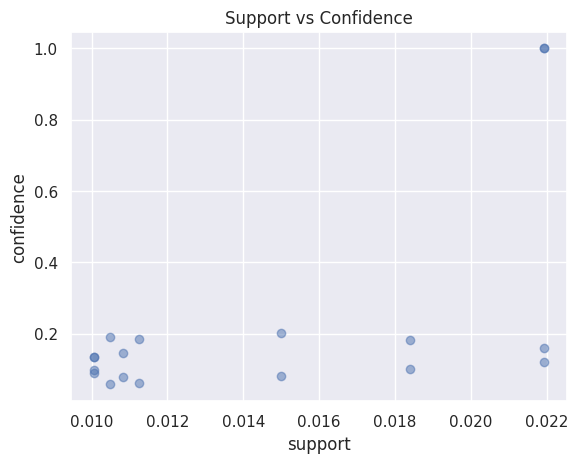

In [36]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()


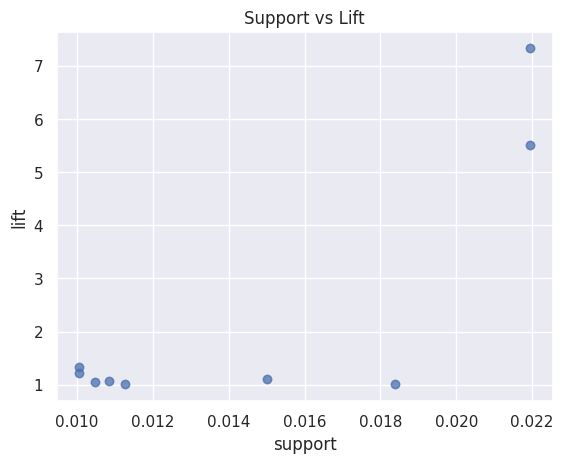

In [37]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()
